In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
minutes_2021_paid = pd.read_csv("minutes_watched_2021_paid_1.csv")
minutes_2021_unpaid = pd.read_csv("minutes_watched_2021_paid_0.csv")
minutes_2022_paid = pd.read_csv("minutes_watched_2022_paid_1.csv")
minutes_2022_unpaid = pd.read_csv("minutes_watched_2022_paid_0.csv")

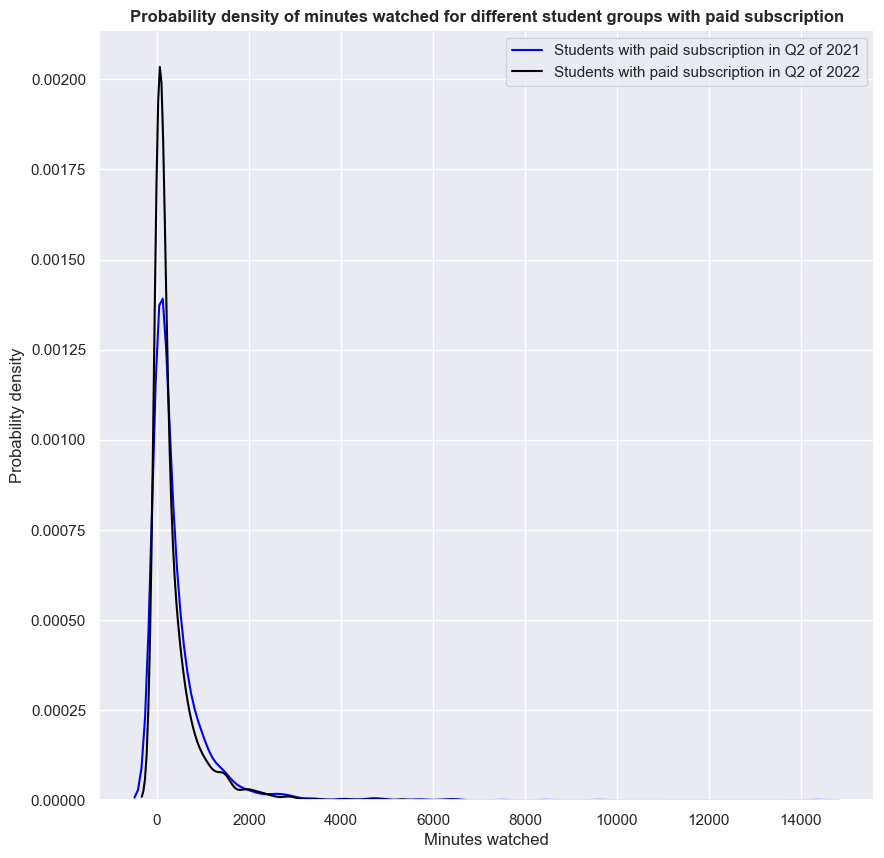

In [3]:
plt.figure(figsize=[10,10])
sns.kdeplot(data=minutes_2021_paid, x="minutes_watched", color = "blue", label = "Students with paid subscription in Q2 of 2021")
# sns.kdeplot(data=minutes_2021_unpaid, x="minutes_watched", color = "red", label = "Students with unpaid subscription in Q2 of 2021")
sns.kdeplot(data=minutes_2022_paid, x="minutes_watched", color = "black", label = "Students with paid subscription in Q2 of 2022")
# sns.kdeplot(data=minutes_2022_unpaid, x="minutes_watched", color = "green", label = "Students with unpaid subscription in Q2 of 2022")

plt.xlabel("Minutes watched")
plt.ylabel("Probability density")
plt.legend()
plt.title("Probability density of minutes watched for different student groups with paid subscription", fontsize = 12, fontweight="bold")
plt.show()

**The probability density curves for the students showed that there are a larger number of students who optred for paid subscription in 2022 compared to 2021. Most of the students, however did not devote a lot of hours to watching videos. The overall trend of engaging in watching videos showed a very similar trend from 2021 to 2022.**

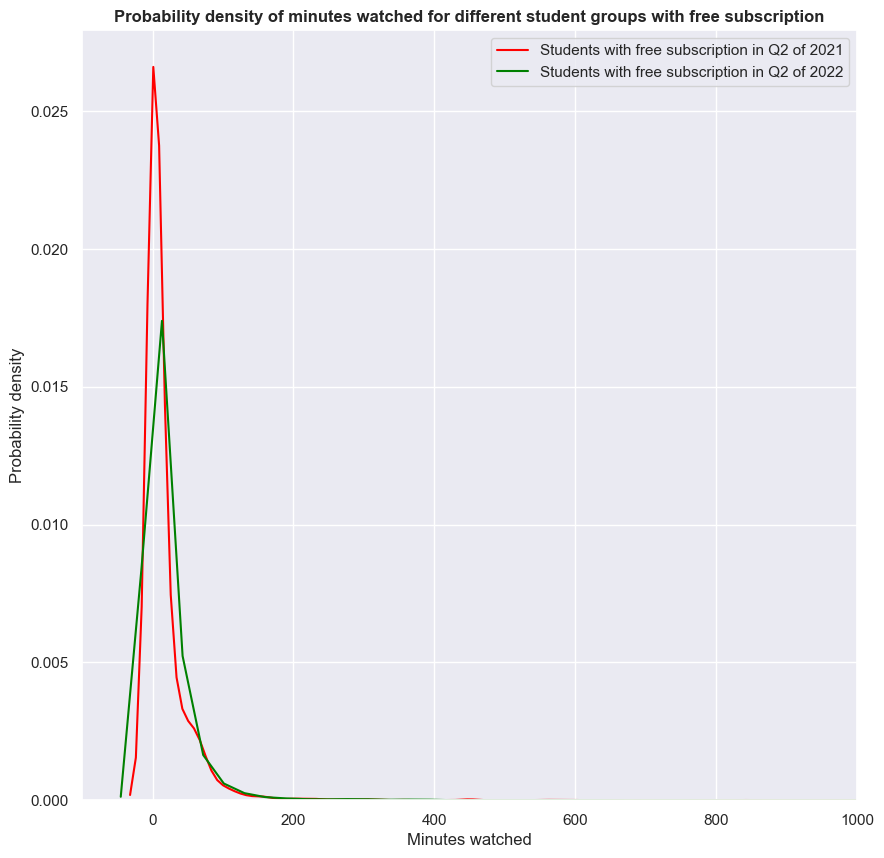

In [4]:
plt.figure(figsize=[10,10])
# sns.kdeplot(data=minutes_2021_paid, x="minutes_watched", color = "blue", label = "Students with paid subscription in Q2 of 2021")
sns.kdeplot(data=minutes_2021_unpaid, x="minutes_watched", color = "red", label = "Students with free subscription in Q2 of 2021")
# sns.kdeplot(data=minutes_2022_paid, x="minutes_watched", color = "black", label = "Students with paid subscription in Q2 of 2022")
sns.kdeplot(data=minutes_2022_unpaid, x="minutes_watched", color = "green", label = "Students with free subscription in Q2 of 2022")

plt.xlabel("Minutes watched")
plt.ylabel("Probability density")
plt.xlim([-100, 1000])
plt.legend()
plt.title("Probability density of minutes watched for different student groups with free subscription", fontsize = 12, fontweight="bold")
plt.show()

**The probability density curves for the students showed that there are a fewer number of students who did not subscribe in 2022 compared to 2021. The trends are similar over 2021 and 2022. The number of hours watched, though are significantly higher for free subscription compared to paid subscription students, hinting at possible high expenses of subscribing on a monthly or yearly basis.**

In [5]:
qv_2021_paid = minutes_2021_paid["minutes_watched"].quantile(q=0.99)
qv_2021_unpaid = minutes_2021_unpaid["minutes_watched"].quantile(q=0.99)
qv_2022_paid = minutes_2022_paid["minutes_watched"].quantile(q=0.99)
qv_2022_unpaid = minutes_2022_unpaid["minutes_watched"].quantile(q=0.99)

minutes_99_paid_2021 = minutes_2021_paid[minutes_2021_paid["minutes_watched"] < qv_2021_paid]
minutes_99_unpaid_2021 = minutes_2021_unpaid[minutes_2021_unpaid["minutes_watched"] < qv_2021_unpaid]
minutes_99_paid_2022 = minutes_2022_paid[minutes_2022_paid["minutes_watched"] < qv_2022_paid]
minutes_99_unpaid_2022 = minutes_2022_unpaid[minutes_2022_unpaid["minutes_watched"] < qv_2022_unpaid]

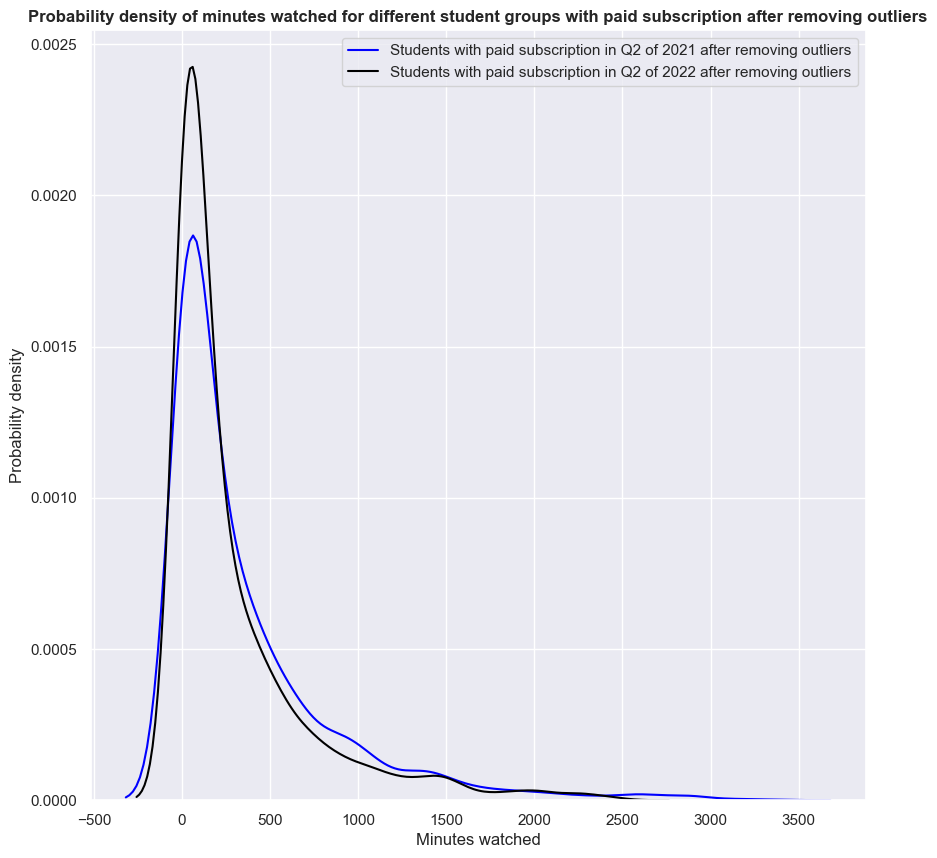

In [6]:
plt.figure(figsize=[10,10])
sns.kdeplot(data=minutes_99_paid_2021, x="minutes_watched", color = "blue", label = "Students with paid subscription in Q2 of 2021 after removing outliers")
# sns.kdeplot(data=minutes_2021_unpaid, x="minutes_watched", color = "red", label = "Students with unpaid subscription in Q2 of 2021")
sns.kdeplot(data=minutes_99_paid_2022, x="minutes_watched", color = "black", label = "Students with paid subscription in Q2 of 2022 after removing outliers")
# sns.kdeplot(data=minutes_2022_unpaid, x="minutes_watched", color = "green", label = "Students with unpaid subscription in Q2 of 2022")

plt.xlabel("Minutes watched")
plt.ylabel("Probability density")
plt.legend()
plt.title("Probability density of minutes watched for different student groups with paid subscription after removing outliers", fontsize = 12, fontweight="bold")
plt.show()

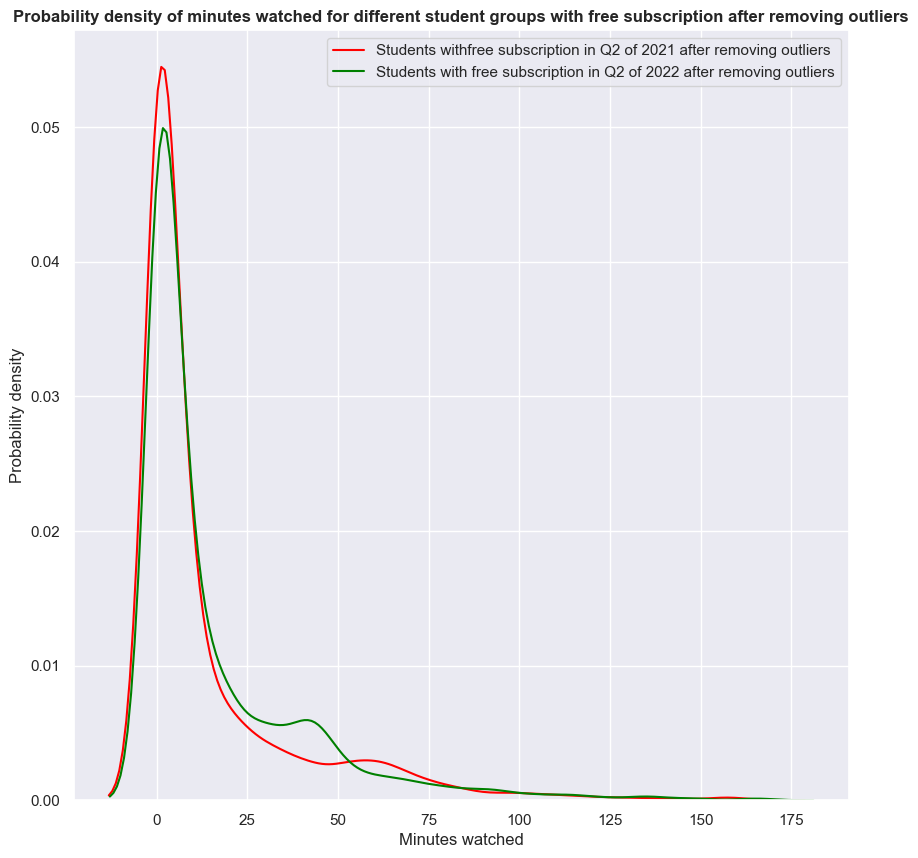

In [7]:
plt.figure(figsize=[10,10])
sns.kdeplot(data=minutes_99_unpaid_2021, x="minutes_watched", color = "red", label = "Students withfree subscription in Q2 of 2021 after removing outliers")
# sns.kdeplot(data=minutes_2021_unpaid, x="minutes_watched", color = "red", label = "Students with unpaid subscription in Q2 of 2021")
sns.kdeplot(data=minutes_99_unpaid_2022, x="minutes_watched", color = "green", label = "Students with free subscription in Q2 of 2022 after removing outliers")
# sns.kdeplot(data=minutes_2022_unpaid, x="minutes_watched", color = "green", label = "Students with unpaid subscription in Q2 of 2022")

plt.xlabel("Minutes watched")
plt.ylabel("Probability density")
plt.legend()
plt.title("Probability density of minutes watched for different student groups with free subscription after removing outliers", fontsize = 12, fontweight="bold")
plt.show()

In [8]:
minutes_99_paid_2021.to_csv("minutes_watched_2021_paid_1_no_outliers.csv", index=False)
minutes_99_unpaid_2021.to_csv("minutes_watched_2021_paid_0_no_outliers.csv", index=False)
minutes_99_paid_2022.to_csv("minutes_watched_2022_paid_1_no_outliers.csv", index=False)
minutes_99_unpaid_2022.to_csv("minutes_watched_2022_paid_0_no_outliers.csv", index=False)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
certificate_data = pd.read_csv("minutes_and_certificates.csv")
certificate_data.head()

,student_id,num_certificates,minutes_watched
0,6,1,148.12
1,182,7,2018.87
2,801,13,6066.00
3,841,3,1623.63
4,862,1,1145.65


In [11]:
data = certificate_data.copy()

In [12]:
data_x = data["minutes_watched"]
data_y = data["num_certificates"]

In [13]:
train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, test_size=0.2, random_state=365)

In [14]:
train_X = np.array(train_x).reshape(len(train_x),1)
train_Y = np.array(train_y).reshape(len(train_y),1)
test_X = np.array(val_x).reshape(len(val_x),1)
test_Y = np.array(val_y).reshape(len(val_y),1)

In [15]:
model = LinearRegression()

In [16]:
model.fit(train_X, train_Y)

LinearRegression()

In [17]:
print(f"Linear regression model intercept is: {model.intercept_}")
print(f"Linear regression model slope is: {model.coef_}")

Linear regression model intercept is: [1.21108135]
Linear regression model slope is: [[0.00168917]]


In [18]:
print(f"The equation of the linear model is: y = {round(model.coef_[0][0],4)}x + {round(model.intercept_[0],3)}")

The equation of the linear model is: y = 0.0017x + 1.211


In [19]:
print(f"The correlation coefficient calculated by the model is: {round(np.corrcoef(train_X[:,0], train_Y[:,0])[0,1],4)}")

The correlation coefficient calculated by the model is: 0.471


In [24]:
y_pred = model.predict(test_X)
y_train_pred = model.predict(train_X)

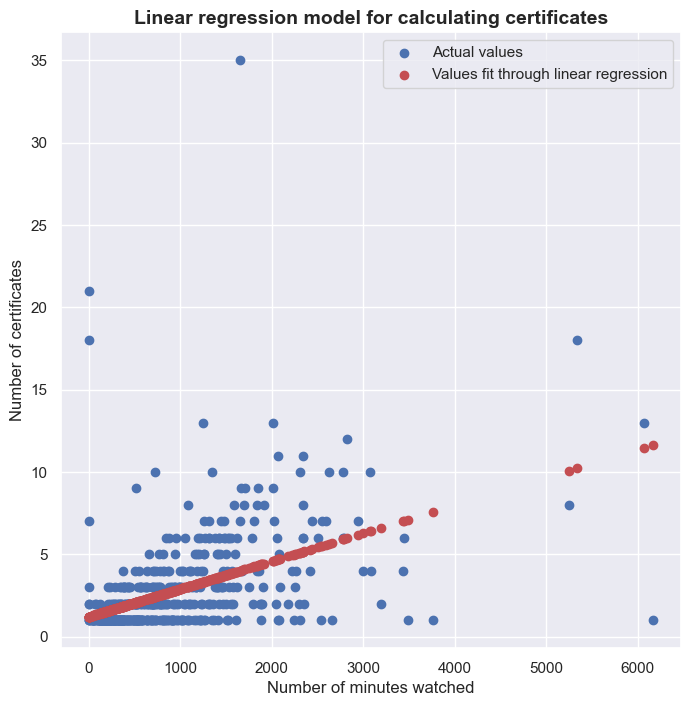

In [51]:
plt.figure(figsize=[8,8])
plt.scatter(train_X, train_Y, color = 'b', label = "Actual values")
plt.scatter(train_X, y_train_pred, color = 'r', label = "Values fit through linear regression")
plt.xlabel("Number of minutes watched")
plt.ylabel("Number of certificates")
plt.title("Linear regression model for calculating certificates", fontweight = "bold", fontsize=14)
plt.legend()
plt.show()

- **The plotted data shows that there isn't a very striking relation between the number of minutes watched and the number of certificates for the students in general.**
- **There are outliers, towards x=0, where students paid just for getting a certificate without devoting a lot of hours to watching, suggesting that they have enough knowledge on particular subjects and value a shareable documentation of their knowledge from this company.**
- **A positive correlation of $r=0.513$ suggests that there is a faint linear relation between the number of minutes watched and the number of certificates issued.**
- **A linear regression model, can be thus fit, to capture this weakly linear relationship. It should be noted that other modifications of the data(like log of the data) did not lead to a strong relation between the two variables.** 

Text(0.5, 1.0, 'Visualization of results')

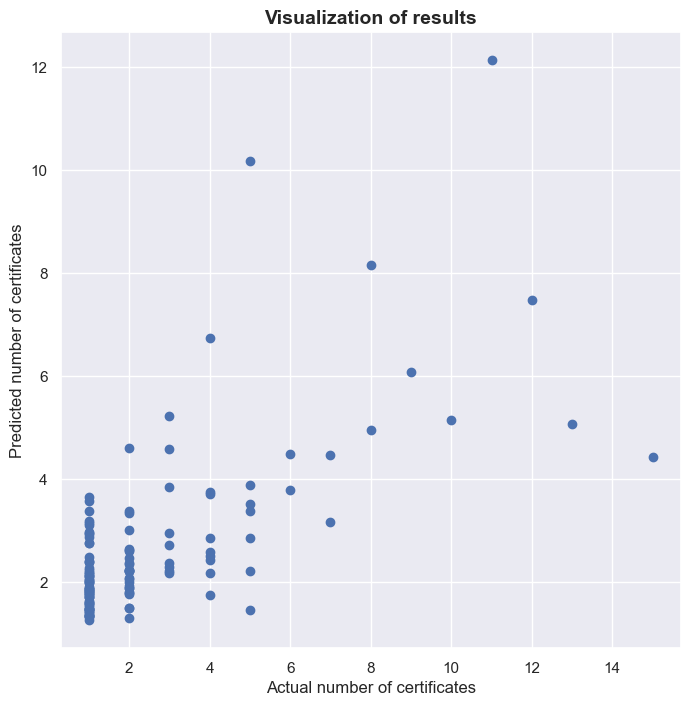

In [22]:
plt.figure(figsize=[8,8])
plt.scatter(test_Y, y_pred, color = 'b')
plt.xlabel("Actual number of certificates")
plt.ylabel("Predicted number of certificates")
plt.title("Visualization of results", fontweight = "bold", fontsize=14)

In [23]:
y_pred_1200 = model.predict([[1200]])
print(y_pred_1200)

[[3.23809089]]
